# SVM Classifier

“Support Vector Machine” (SVM) is a **supervised machine** learning algorithm which can be used for both **classification or regression** challenges. However,  it is **mostly used in classification** **plot each data item** as a point in **n-dimensional** space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we **perform classification** by **finding** the **hyper-plane** that differentiate the two classes very well as shown below. **Support Vectors** are simply the co-ordinates of individual observation which are **closest to the hyper plane**.

![title](https://cdn-images-1.medium.com/max/600/0*0o8xIA4k3gXUDCFU.png)

Note that there can be **multiple hyper planes** which can separate the data points but we want the hyperplane which **maximizes the margin i.e maximum distance between the support vectors.** 

## The Math behind SVM
Check out following [video's](https://youtu.be/mA5nwGoRAOo) for detailed explanation<br><br>

In order to implement the SVM from scratch, we need to understand the fundamental math behind it so that we can write code which helps us find the optimum hyperplane.As we can see from above image our key **objective is to find a optimum hyperplane which maximizes the margin**. Note that the **hyperplane** can be a **line(2D features) or a plane(for >2D features)**.

Let us consider the case of 2D features, i.e the hyperplane is a line. Let the line is represented by the equation:

$$ w.x +b $$ 

where **w** is the **slope(Weight)** of the line and **b** is the **intercept(bias)** for the line. **$x$** is the **feature space**. Our objective is the maximize the distance margin between positive and negative classes. We can formulate it as follows:
For every $x_i$:

$$ w.x_i + b >= 1$$ for $x_i$ having class 1
$$or$$

$$ w.x_i + b <= -1$$ for $x_i$ having class -1

1. if w.x+b=0 then we get the decision boundary i.e optimum hyper plane
2. if w.x+b=1 then we get (+)class hyperplane or +ve support vector
3. if w.x+b=-1 then we get (-)class hyperplane or -ve support vector

So above equations helps us set the hyper plane and decision boundary. But we also **need to maximize the margin i.e the distance between the +ve and -ve support vectors**. It gets reduced to following optimization problem:



![title](https://cdn-images-1.medium.com/max/1200/1*colCMuTP_LN4zvjfrsZcQA.jpeg)

So, as per our problem formulation, **D1** represents the **+ve** support vector and **D2** represents the **-ve** support vector. We want to maximize the distance between these two planes which reduces to maximizing $\frac{2}{\vert{w}\vert}$. This can be better understood by following equation:
$$ Max(W) = \frac{((X+ - X-).w)}{|w|}$$ where X+.w = 1 and X-.w = -1

So we can intern minimize |w| or 1/2 $|w|^2$ making it a convex optimization as shown above.

![title](https://cdn-images-1.medium.com/max/800/1*6mcff3dEDuTFT21IvlL1_Q.jpeg)

Let $y$ represent the the true output label with $y_+$ as 1 and $y_-$ as -1. We multiply our support vector equation with $y$ and finally get the following equation as shown above:
$$y_i (W^Tx+b) =1$$

So the loss function for any $x_i$ is given as:
![title](https://cdn-images-1.medium.com/max/1200/1*3xErahGeTFnbDiRuNXjAuA.png)

i.e **f(x)** is the predicted class based on the **sign of $W^Tx+b$.** If the **predicted sign is correct**, there is **no loss** i.e 0, else the loss is given as above. Our **objective is to reduce this loss and minimize the |w| at the same time**. So, the final constrained equation looks like this:
![title](https://cdn-images-1.medium.com/max/1200/1*GQAd28bK8LKOL2kOOFY-tg.png)

**Note $\lambda$ acts as regularization parameter. The objective of the regularization parameter is to balance the margin maximization and loss. **

The gradients for above loss function is given as :
![title](https://cdn-images-1.medium.com/max/800/1*WUphtYLfTOAoaXQXvImBeA.png)

When there is no misclassification, i.e our model correctly predicts the class of our data point, we only have to update the gradient from the regularization parameter.
![title](https://cdn-images-1.medium.com/max/800/1*-nKEXrWos8Iuf-DWSv_srQ.png)

When there is a misclassification, i.e our model make a mistake on the prediction of the class of our data point, we include the loss along with the regularization parameter to perform gradient update.
![title](https://cdn-images-1.medium.com/max/800/1*tnvMhAKaTUCO43diEvtTAQ.png)

## Steps to implement SVM in code

Now that we have understood the math behind SVM and have defined what we need to optimize, lets look at the code to implement it:


### 1. Initialization
We initialize the `l_rate` which is $\alpha$ and `epoch` which is the number of iteration.

In [1]:
class SVM:
    def __init__(self, l_rate=.00001, epoch=100000):
        self.l_rate = l_rate
        self.epoch = epoch

### 2. Fitting the data
We initialize a weight matrix equal to the number of features. **Note we are not taking a bias term for simplicity**. Now for each x,y pair, we check the gradient update condition as discussed above and update it. Note we have kept $\lambda$ as dynamic and it changes with each epoch. So, the updates are bigger initially and smaller subsequently. We also have a `plot` function, which plots the 2D graph of x,y and decision boundary.

In [2]:
def fit(self, x, y, plot=True):
    self.w = np.zeros(x.shape[1])

    for e in range(self.epoch):

        for i, val in enumerate(x):
            val1 = np.dot(x[i], self.w)
            if (y[i]*val1 < 1):
                self.w = self.w + self.l_rate * ((y[i]*x[i]) - (2*(1/(e+1))*self.w))
            else:
                self.w = self.w + self.l_rate * (-2*(1/(e+1))*self.w)

    if plot:
        self.plot(x,y)

### 3. Plotting the data and decision boundary
The following function makes a 2D plot of x,y and also the decision boundary to help us visualize the fitted model.

In [3]:
def plot(self, x, y):
    for val, inp in enumerate(x):
        if y[val] == -1:
            plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
        else:
            plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5)  


    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals =-self.w[0]/self.w[1] * x_vals
    plt.plot(x_vals, y_vals, '--')   

### 4. Predict function
Once we have found the optimum weight, we multiply them with test item features and predict as 1 or -1 based on the sign of the output.

In [4]:
def predict(self, x):
    y_pred = np.sum(self.w*x, axis=1)
    return np.array([1 if y>0 else -1 for y in y_pred])

## Putting everything together

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


class SVM:
    def __init__(self, l_rate=.00001, epoch=100000):
        self.l_rate = l_rate
        self.epoch = epoch
    
    def fit(self, x, y, plot=True):
        self.w = np.zeros(len(x[0]))
        
        for e in range(self.epoch):
    
            for i, val in enumerate(x):
                val1 = np.dot(x[i], self.w)
                if (y[i]*val1 < 1):
                    self.w = self.w + self.l_rate * ((y[i]*x[i]) - (2*(1/(e+1))*self.w))
                else:
                    self.w = self.w + self.l_rate * (-2*(1/(e+1))*self.w)
        
        if plot:
            self.plot(x,y)
            
    def plot(self, x, y):
        for val, inp in enumerate(x):
            if y[val] == -1:
                plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
            else:
                plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5)  


        axes = plt.gca()
        x_vals = np.array(axes.get_xlim())
        y_vals =-self.w[0]/self.w[1] * x_vals
        plt.plot(x_vals, y_vals, '--')   
    
    def predict(self, x):
        y_pred = np.sum(self.w*x, axis=1)
        return np.array([1 if y>0 else -1 for y in y_pred])

**Note that above method is not the best way of implementing SVM for production and we have implemented a very simplified version to get an intuitive understanding of what goes behind the scene**. Normally, we use optimization libraries such as **cvxopt** to solve the optimization problem which does it in much more efficient and effective way. Please check out this [implementation](https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/support_vector_machine.py) which is much more optimized and uses **cvxopt**.

## Checking our implementation

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

We will use only **2 features and 2 classes** from the iris data for simplicity.

In [7]:
x = x[:100,:2]
y = y[:100]

In [8]:
y = np.array([1 if i>0 else -1 for i in y])

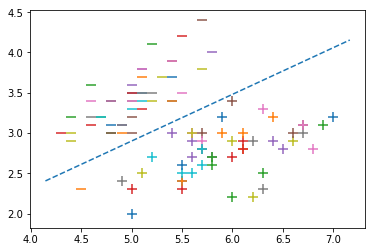

In [9]:
clf = SVM()
clf.fit(x,y)

Weights of decision boundary

In [10]:
clf.w

array([ 2.33789749, -4.03062021])

In [11]:
print("Accuracy:",np.sum(y==clf.predict(x))*1.0/len(y))

Accuracy: 0.99


### Sklearn implementation

In [12]:
from sklearn.svm import SVC
skclf = SVC(kernel='linear', degree=1)
skclf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
skclf.coef_

array([[ 2.22720466, -2.24959915]])

**We can see that our weights are different compared to sklearn's weight for decision boundary showing that out implementation is not optimized**.

In [14]:
print("Accuracy:",np.sum(y==skclf.predict(x))*1.0/len(y))

Accuracy: 1.0


## Kernel Trick
In SVM, it is easy to have a linear hyper-plane between these two classes. But, another burning question which arises is, should we need to add this feature manually to have a hyper-plane. No, SVM has a technique called the kernel trick. These are functions which takes low dimensional input space and transform it to a higher dimensional space i.e. it converts not separable problem to separable problem, these functions are called kernels. It is mostly useful in non-linear separation problem. Simply put, it does some extremely complex data transformations, then find out the process to separate the data based on the labels or outputs you’ve defined.

## Pros and Cons associated with SVM
**Pros:**
1. It works really well with clear margin of separation
2. It is effective in high dimensional spaces.
3. It is effective in cases where number of dimensions is greater than the number of samples.
4. It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

**Cons:**
1. It doesn’t perform well, when we have large data set because the required training time is higher
2. It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
3. SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.

**Check out this [blog](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72) for better understanding and various parameters to tune for SVM.**